In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
import pathlib
import os
import seaborn as sns
import pandas as pd
from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
sns.set()
# https://datascienceschool.net/view-notebook/8903aa20770746e78fb5b1834ab5334b/   prophet 사용

In [42]:
data = pd.read_csv("C:/Users/pythonai/Downloads/jeju_data_ver1/201901-202003.csv", parse_dates =["REG_YYMM"])

In [44]:
data.REG_YYMM = pd.to_datetime(data.REG_YYMM, format='%Y%m')

In [48]:
data.head(100)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
5,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7
6,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
7,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
8,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20
9,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40


In [73]:
y_train = data['AMT']
X_train = data.drop('AMT', axis=1, inplace=False)

In [74]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train, y_train)

ModuleNotFoundError: No module named 'catboost'

In [83]:
data.dtypes, data.index.dtype

(CARD_SIDO_NM    object
 CARD_CCG_NM     object
 STD_CLSS_NM     object
 HOM_SIDO_NM     object
 HOM_CCG_NM      object
 AGE             object
 SEX_CTGO_CD      int64
 FLC              int64
 CSTMR_CNT        int64
 AMT              int64
 CNT              int64
 dtype: object, dtype('<M8[ns]'))

In [84]:
data.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01',
               ...
               '2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01'],
              dtype='datetime64[ns]', name='REG_YYMM', length=24697792, freq=None)

MemoryError: 

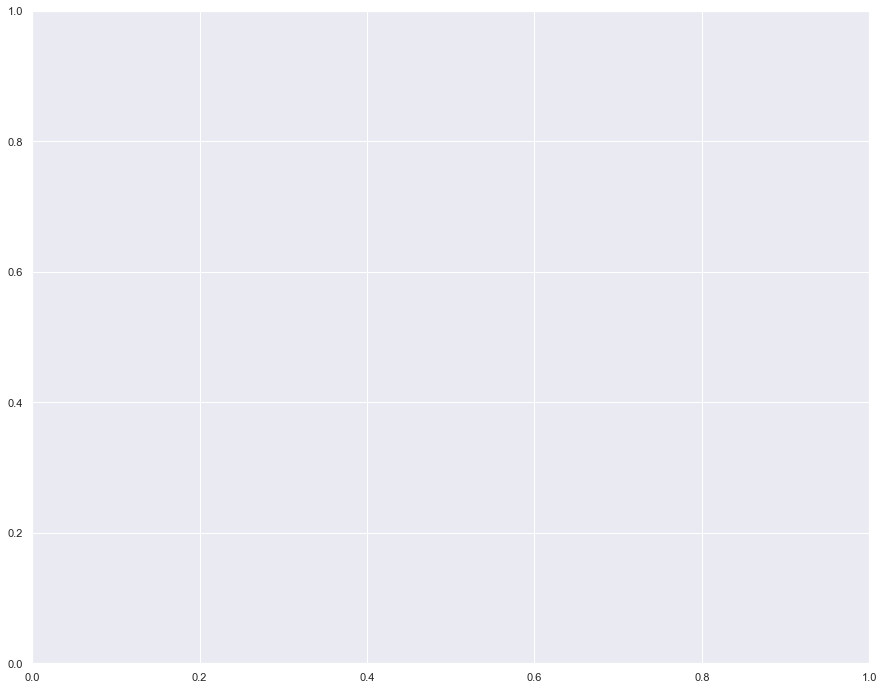

In [86]:
fig, ax = plt.subplots()
data['AMT'].plot(figsize=(15,12),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('C')
ax.set_title('Delhi')
plt.show()

In [45]:
submission = pd.read_csv("C:/Users/pythonai/Downloads/jeju_data_ver1/submission.csv")

In [46]:
submission

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0
5,5,202004,강원,그외 기타 스포츠시설 운영업,0
6,6,202004,강원,그외 기타 종합 소매업,0
7,7,202004,강원,기타 대형 종합 소매업,0
8,8,202004,강원,기타 수상오락 서비스업,0
9,9,202004,강원,기타 외국식 음식점업,0


In [10]:
data.shape

(24697792, 12)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24697792 entries, 201901 to 202003
Data columns (total 11 columns):
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
dtypes: int64(5), object(6)
memory usage: 2.2+ GB


In [27]:
data['SEX_CTGO_CD'].value_counts()

1    14506378
2    10191414
Name: SEX_CTGO_CD, dtype: int64

In [29]:
data.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [65]:
data = data.set_index('REG_YYMM') 

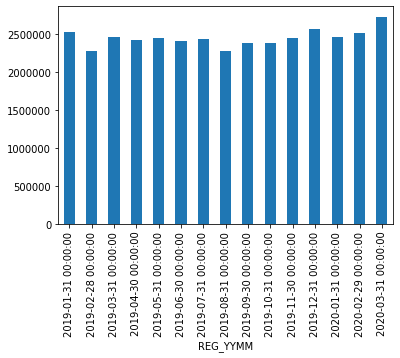

In [67]:
data['AMT'].resample(rule='M').mean().plot('bar')

In [70]:
data['AGE'].unique()

array(['20s', '30s', '40s', '50s', '60s', '70s', '10s'], dtype=object)

In [ ]:
data['AGE']

In [76]:
tmp = data['STD_CLSS_NM'].groupby(data['AMT']).sum()

In [81]:
temp = data[data["CARD_SIDO_NM"]].groupby(["STD_CLSS_NM", data.index], as_index=False)[['AMT']].sum()

KeyError: "None of [Index(['강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원',\n       ...\n       '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북'],\n      dtype='object', length=24697792)] are in the [columns]"

In [ ]:
tmp['STD_CLSS_NM', 'AveragePrice']].reset_index(drop=True)

In [61]:
data = set_index(data['REG_YYMM'])

NameError: name 'set_index' is not defined

In [71]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [72]:
from fbprophet import Prophet

m = Prophet()
m.fit(data)

Importing plotly failed. Interactive plots will not work.


ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.